# Task-1: Downloading the dataset

penguins_size.csv

# Task-2: Loading the dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/penguins_size.csv')

print("Penguins Dataset is loaded successfully.")

FileNotFoundError: ignored

# Task-3: Perform the Below Visualizations for that dataset

1.   Univariate Analysis
2.   Bi - Variate Analysis
3.   Multivariate Analysis


1. **Univariate Analysis:**

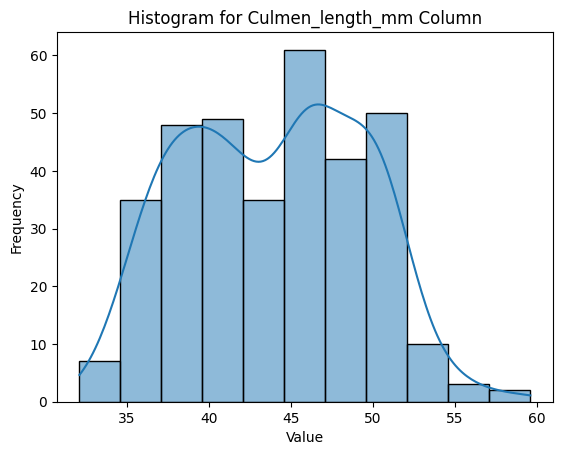

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['culmen_length_mm'], kde=True)
plt.title('Histogram for Culmen_length_mm Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

2. **Bi-Variate Analysis:**

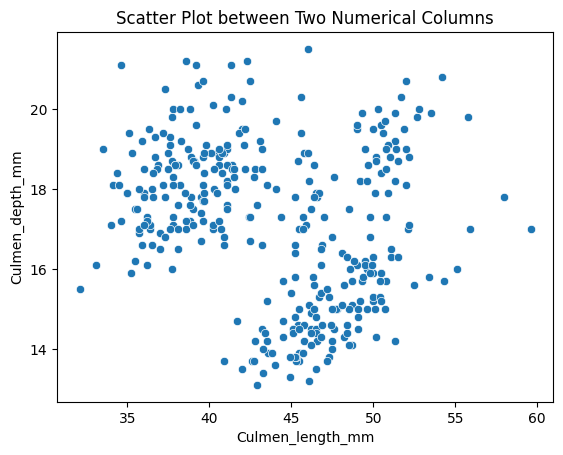

In [ ]:
sns.scatterplot(data=dataset, x='culmen_length_mm', y='culmen_depth_mm')
plt.title('Scatter Plot between Two Numerical Columns')
plt.xlabel('Culmen_length_mm')
plt.ylabel('Culmen_depth_mm')
plt.show()

3. **Multi-Variate Analysis**

<ipython-input-7-2307cf8ebe00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


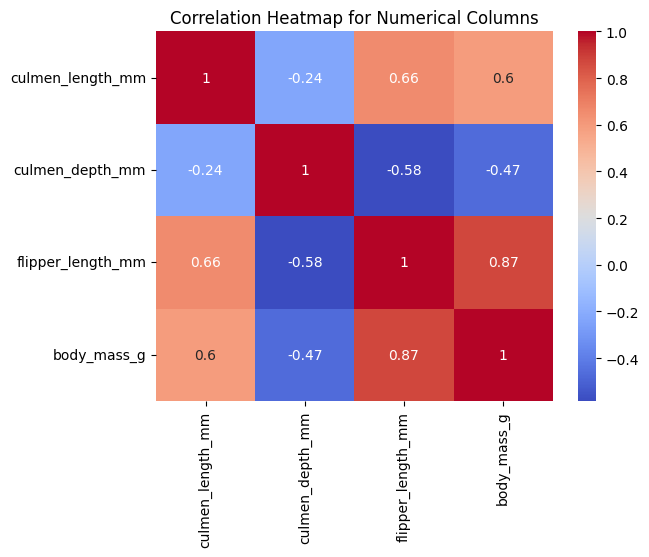

In [ ]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

**Multi-variate Analysis using Pairplot:**

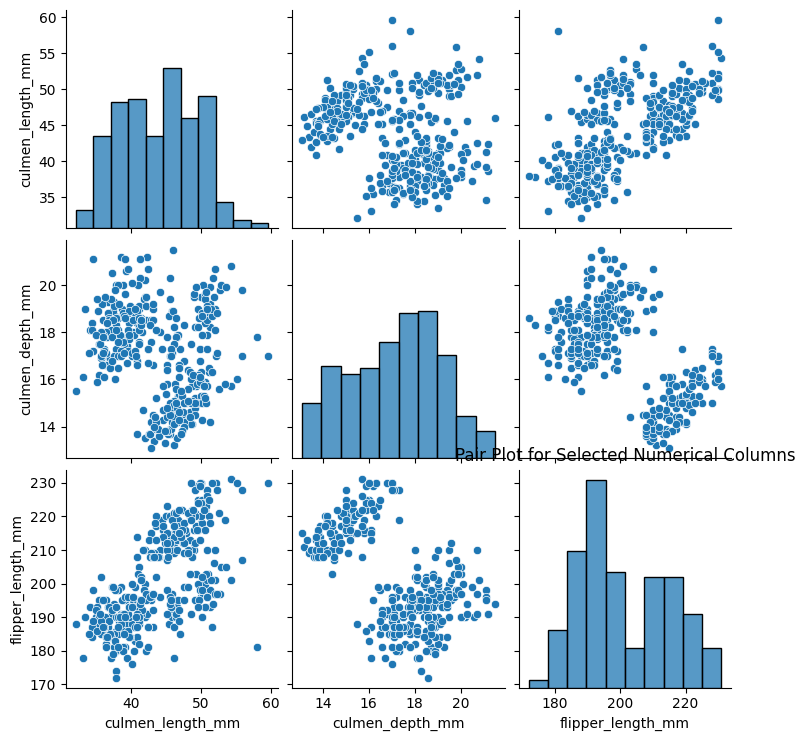

In [ ]:
sns.pairplot(dataset[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']])
plt.title('Pair Plot for Selected Numerical Columns')
plt.show()

# Task-4: Perform descriptive statistics on the dataset

In [ ]:
numerical_stats = dataset.describe()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

Descriptive Statistics for Numerical Columns:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


# Task-5: Handling the missing values:

In [ ]:
missing_values = dataset.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Remove rows with missing values
dataset_cleaned = dataset.dropna()

# Impute missing values for numerical columns with mean
numerical_columns = dataset.select_dtypes(include='number')
for column in numerical_columns:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

# Impute missing values for categorical columns with mode
categorical_columns = dataset.select_dtypes(include='object')
for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

# Mark missing values in a categorical column with 'Missing'
dataset['culmen_length_mm'].fillna('Missing', inplace=True)

# Drop columns with too many missing values
threshold = len(dataset) * 0.2
dataset.dropna(axis=1, thresh=threshold, inplace=True)

# Interpolate missing values for a numerical column
dataset['culmen_length_mm'].interpolate(method='linear', inplace=True)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(dataset.head())

Missing Values per Column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
Cleaned Dataset:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386    MALE  
4  3450.000000  FEMALE  


# Task-6: Find the outliers and replace them outliers.

In [ ]:
# Sort the column in ascending order
sorted_column = dataset['culmen_depth_mm'].sort_values()

# Calculate Q1 and Q3
Q1 = sorted_column.quantile(0.25)
Q3 = sorted_column.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset['culmen_depth_mm'] < lower_bound) | (dataset['culmen_depth_mm'] > upper_bound)]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


# Task-8: Encoding the categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['sex'] = le.fit_transform(dataset['sex'])


In [ ]:
dataset['island'] = le.fit_transform(dataset['island'])

In [ ]:
dataset['species'] = le.fit_transform(dataset['species'])

In [ ]:
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1


# Task-7: Check the correlation of independent variables with the target

In [ ]:
dataset.corr()['species'].sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.851160
body_mass_g          0.747726
culmen_length_mm     0.728674
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741335
Name: species, dtype: float64

<Axes: >

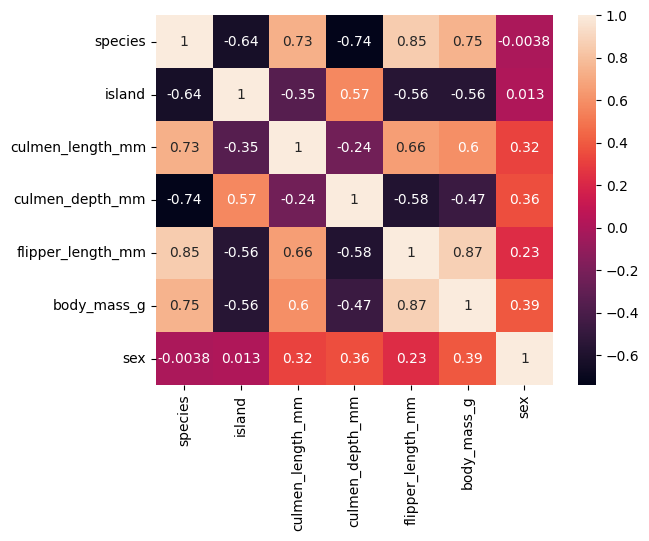

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

# Task-9: Split the data into dependent and independent variables

In [ ]:
X = dataset.drop(columns=['species'],axis=1)
y = dataset['species']

In [ ]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,2
1,2,39.50000,17.40000,186.000000,3800.000000,1
2,2,40.30000,18.00000,195.000000,3250.000000,1
3,2,43.92193,17.15117,200.915205,4201.754386,2
4,2,36.70000,19.30000,193.000000,3450.000000,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Task-10: Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


# Task-11: Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

# Task-12: Check training and testing data shape

In [ ]:
X_train.shape

(240, 6)

In [ ]:
X_test.shape

(104, 6)

In [ ]:
y_train.shape

(240,)

In [ ]:
y_test.shape

(104,)